## FIIR Delay effect
We consider the following mean filter defined by the input-output equation 
* s[t] = e[t]+ α e[t−D]

####  Impulse response of the filter
The impulse response is obtained simply by using the Dirac as the input (e[t]=δ[t]):
* s[t] = δ[t] + αδ[t−D]

That is :
 * s[0] = 1 if D $\neq$ 0 , 
 otherwise s[0] = 1 + $\alpha$
 * s[D] = α if D $\neq$ 0 , otherwise s[D] = 1 + $\alpha$
 * s[t] = 0,  if D $\neq$ t and t $\neq$ 0
 
#### Frequency response

##### Transfert function
The transfert function H(z) can be obtained by applying the z-transform on the input-output equation and using the properties of the z-transform (in particular, the time shift properties)  \begin{aligned}S(z) &=E(z)+\alpha z^{-D}E(z) \\ & =(1+\alpha z^{-D})E(z) \end{aligned} 
Then 

\begin{aligned}H(z) & = (1+\alpha z^{-D}) \end{aligned} 

#####  Complex gain
The complex gain is obtained from the transfert function:

\begin{aligned} \hat{h}(\nu) & = H(e^{i 2 \pi \nu}) = 1 + \alpha e^{-i 2 D \pi \nu}   \end{aligned}  
Then, the FREQUENCE RESPONSE of the filter is :

\begin{aligned} 
|\hat{h}(\nu)|^2 & = |1 + \alpha e^{-i 2 D \pi \nu}|^2 \\  &=1 + \alpha ( e^{-i 2 D \pi \nu} + e^{i 2 D \pi \nu} ) + \alpha^2 \\ & = 1+2\alpha \cos(2 D \pi \nu)+\alpha^2 \end{aligned} 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile 
from pydub import AudioSegment
from scipy.signal import lfilter, freqz, filtfilt
from scipy.fftpack import fftshift, fft
from IPython.display import display

### Preparation

In [3]:
# Loading the audio file
sound = AudioSegment.from_mp3("string1.mp3")
sound.export("string1.wav", format="wav")
Fs, x = wavfile.read('string1.wav') # load the data

if sound.channels == 2 :
    x = x[:,0]

T = len(x)

### Filtering implementation

In [4]:
D = 20000
alpha = 0.25
eps = 10**(-8)
# first method
s1 = np.zeros(T)
s1[0:D] = x[0:D]
for t in range(D,T):
    s1[t] = x[t] + alpha*x[t-D] 

# second method
h = np.zeros(D+1)
print(h.shape)
h[0] = 1
h[D] = alpha
s2 = lfilter(h,1,x)
#s2[0:D] = x[0:D]

# comparization
display(np.linalg.norm(s1-s2))

(20001,)


0.0

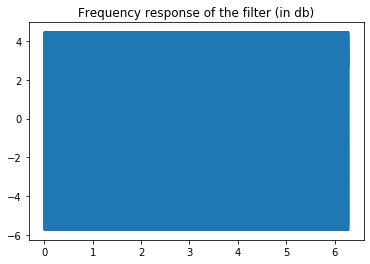

In [5]:
[W,H] = freqz(h,1,round(T/2),Fs)
plt.figure(1)
plt.plot(W,20*np.log(abs(H)+eps))
plt.title('Frequency response of the filter (in db)')
plt.show()

The filter is a low pass filter: an attenuation of frequencies about 25 db is attained around 15000 Hz.

We compare the spectrum of the input signal and the ouput signal. The signals are real, so we only display the positive frequencies

In [6]:
x_fft = fft(x)
x_spectrum_db = 20*np.log(abs(x_fft)+eps)

s_fft = fft(s1)
s_spectrum_db = 20*np.log(abs(s_fft)+eps)

The frequency axis is given in W. We could construct the axis as freq_axis = linspace(0,fs/2,round(T/2))

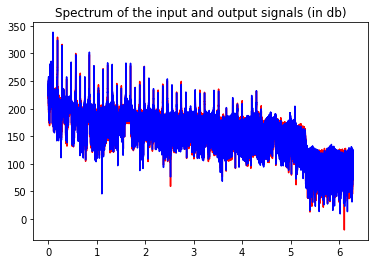

In [23]:
freq_axis = W
plt.figure(2)
plt.plot(freq_axis,x_spectrum_db[:round(T/2)],'r',freq_axis,s_spectrum_db[:round(T/2)],'b')
plt.title('Spectrum of the input and output signals (in db)')
plt.show()

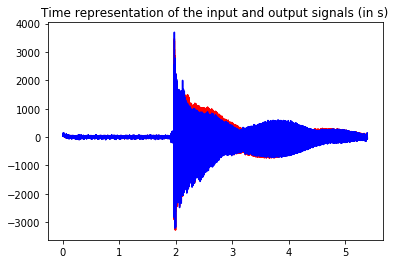

In [24]:
time_axis = np.linspace(0,T/Fs,T)
plt.figure(3)
plt.plot(time_axis,x,'r',time_axis,s2,'b')
plt.title('Time representation of the input and output signals (in s)')
plt.show()

In [25]:
import scipy.io.wavfile

scipy.io.wavfile.write('string1_FIIR_delay.wav',Fs,s2)